In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [4]:

# Load the dataset
data = pd.read_csv(r"C:\Users\USER\Downloads\LOAN_SANCTION_NEW.csv")  # Replace 'your_data.csv' with your actual file name
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0,5849,0.0,120,360,1,0,0
1,2,0,1,1,0,0,4583,1508.0,128,360,1,1,1
2,3,0,1,0,0,1,3000,0.0,66,360,1,0,0
3,4,0,1,0,1,0,2583,2358.0,120,360,1,0,0
4,5,0,0,0,0,0,6000,0.0,141,360,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,1,0,0,0,0,2900,0.0,71,360,1,1,0
610,611,0,1,3,0,0,4106,0.0,40,180,1,1,0
611,612,0,1,1,0,0,8072,240.0,253,360,1,0,0
612,613,0,1,2,0,0,7583,0.0,187,360,1,0,0


Accuracy: 0.7837837837837838


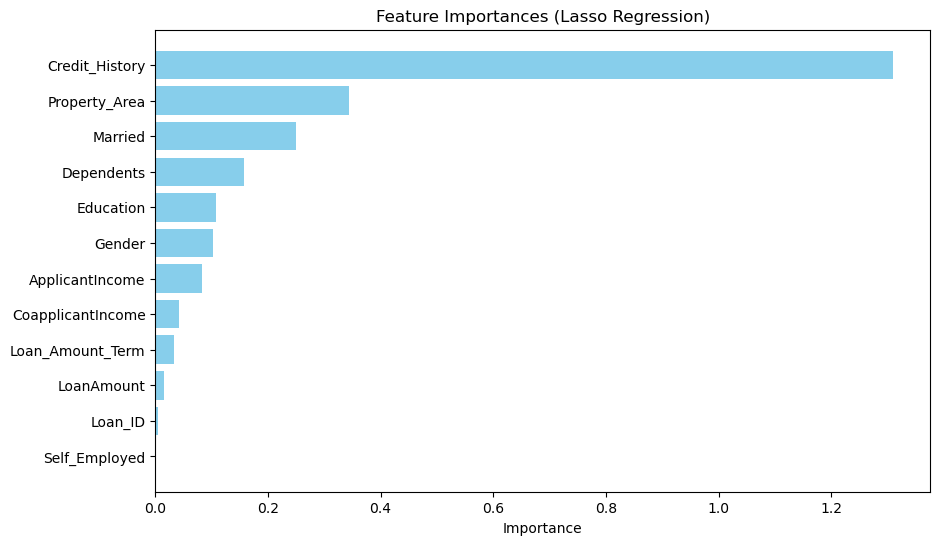

In [5]:


    # Separate features (X) and target variable (y)
    X = data.drop('Loan_Status', axis=1)  # Features
    y = data['Loan_Status']  # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Apply feature scaling for Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize Logistic Regression
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

    # Train the model
    lasso_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    predictions = lasso_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")

    # Extract feature importance from coefficients
    feature_importance = lasso_model.coef_[0]
    feature_names = X.columns

    # Create a DataFrame of feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs(feature_importance)})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances (Lasso Regression)')
    plt.gca().invert_yaxis()
    plt.show()





In [6]:
from sklearn.metrics import accuracy_score, classification_report
# Get classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       120
           1       0.93      0.42      0.57        65

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

